# Digits Dataset - Logistic Regression

## Imports

In [80]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style("whitegrid")

import sklearn

import warnings
warnings.filterwarnings("ignore")

## Data

In [81]:
from sklearn.datasets import load_digits

In [82]:
digits = load_digits()

In [83]:
df = pd.DataFrame(data=np.c_[digits["data"], digits["target"]],columns = digits["feature_names"]+["target"])

In [84]:
df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9.0


In [85]:
df["target"].nunique()

10

In [86]:
print(df["target"].unique())

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


## Visualization

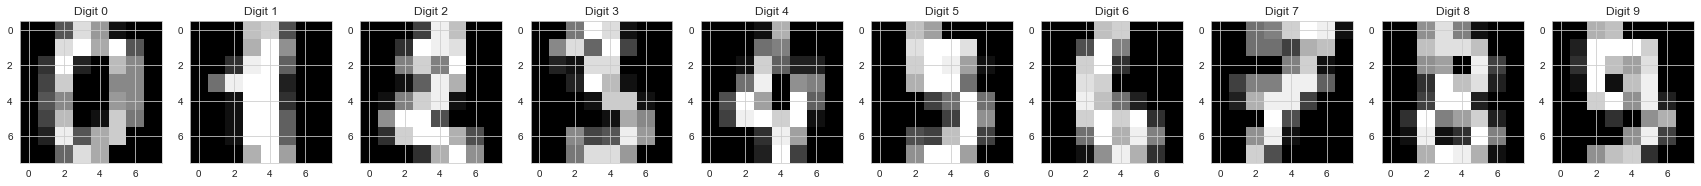

In [194]:
plt.figure(figsize=[30,5])
for i, (image,label) in enumerate(zip(digits.data[0:10],digits.target[0:10])):
    plt.subplot(1, 10, i + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap="gray")
    plt.title(f"Digit {i}")

## Train Test Split

In [176]:
from sklearn.model_selection import train_test_split

In [177]:
X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.42, random_state=101)

In [178]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1042, 64) (755, 64) (1042,) (755,)


## Logistic Regression

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
log_reg = LogisticRegression()

In [181]:
log_reg.fit(X_train, y_train)

LogisticRegression()

In [204]:
pred = log_reg.predict(X_test)

## Model accuracy

In [185]:
pred.shape

(755,)

In [186]:
from sklearn.metrics import confusion_matrix, classification_report

In [187]:
print(confusion_matrix(y_test, pred))

[[73  0  0  0  0  0  0  0  0  0]
 [ 0 70  0  0  0  0  0  0  2  0]
 [ 0  1 68  0  0  0  0  0  0  0]
 [ 0  0  0 79  0  1  0  0  0  1]
 [ 0  0  0  0 81  0  0  0  2  0]
 [ 0  0  0  0  0 78  0  0  0  2]
 [ 0  1  0  0  1  0 64  0  1  0]
 [ 0  0  0  0  3  0  0 70  0  1]
 [ 0  4  1  1  0  1  0  0 73  0]
 [ 0  0  0  0  0  1  0  0  1 74]]


In [188]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        73
           1       0.92      0.97      0.95        72
           2       0.99      0.99      0.99        69
           3       0.99      0.98      0.98        81
           4       0.95      0.98      0.96        83
           5       0.96      0.97      0.97        80
           6       1.00      0.96      0.98        67
           7       1.00      0.95      0.97        74
           8       0.92      0.91      0.92        80
           9       0.95      0.97      0.96        76

    accuracy                           0.97       755
   macro avg       0.97      0.97      0.97       755
weighted avg       0.97      0.97      0.97       755



## Innacurate Predictions

In [189]:
i = 0
wrong = []
for prediction, true in zip(pred, y_test):
    if prediction != true:
        wrong.append(i)
    i += 1

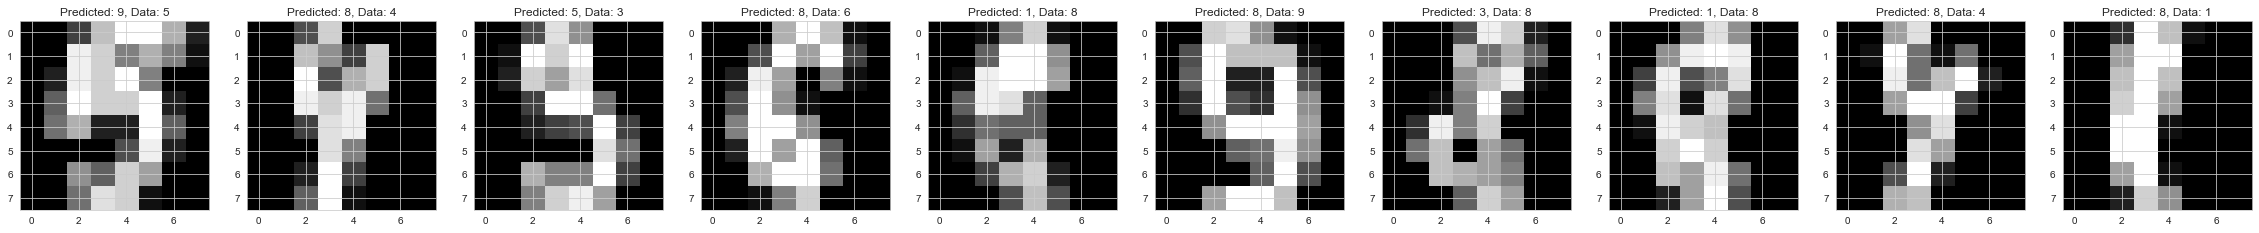

In [203]:
plt.figure(figsize=[40,20])
for plot, false in enumerate(wrong[:10]):
    plt.subplot(1,10, plot + 1)
    plt.imshow(np.reshape(X_test[false], (8,8)), cmap = "gray")
    plt.title(f"Predicted: {pred[false]}, Data: {y_test[false]}")